In [4]:
"""
From a Re-exposure forgetting experiment dump, make a plot.
"""
import os
import torch
from collections import defaultdict
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
import scipy
import pandas as pd

# Print all variables on their own lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 1000)

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica"
# })
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [2]:


# Use relative path in WSL issues
main_outdir = "../imgs"

# READ PATHS (Dumps)
parent_outputdir = "/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/results/ego4d_action_recog/final01_01_finetuning_sgd/logs/GRID_SOLVER-BASE_LR=0-01_SOLVER-MOMENTUM=0-0_SOLVER-NESTEROV=True/2022-09-13_10-53-52_UID958392f7-c477-4a09-a7ac-c72cc81251c2/transfer_eval_DEBUG_CUTOFF_10/postprocess_results"
dump_filename_fmt = "{}_instance_count.csv"
# action_instance_count.csv  noun_instance_count.csv  verb_instance_count.csv

# Plot configs
plot_config = {
    "color": 'royalblue',
    "dpi": 600,
    "figsize": (6,6),
    "xlabel": "re-exposure iterations",
    "ylabel": "",
    "title": None
}

# KEYS
saved_dumpkeys = [
    'train_action_past/FORG_EXPOSE_loss',
    'train_action_past/FORG_EXPOSE_top1acc',

    'train_verb_past/FORG_EXPOSE_loss',
    'train_verb_past/FORG_EXPOSE_top1acc',
    'train_verb_past/FORG_EXPOSE_top5acc',
    'train_verb_past/FORG_EXPOSE_top20acc',

    'train_noun_past/FORG_EXPOSE_loss',
    'train_noun_past/FORG_EXPOSE_top1acc',
    'train_noun_past/FORG_EXPOSE_top5acc',
    'train_noun_past/FORG_EXPOSE_top20acc'
]
CHOSEN_KEY = 'train_action_past/FORG_EXPOSE_loss'

# Adapt cfg
ylabel_map = {
    'train_action_past/FORG_EXPOSE_loss': r"RF_action",
    'train_verb_past/FORG_EXPOSE_loss': r"RF_verb",
    'train_noun_past/FORG_EXPOSE_loss': r"RF_noun",
#     'train_action_past/FORG_EXPOSE_loss': r"$RF_{\text{action}}$",
}
plot_config['ylabel'] = ylabel_map[CHOSEN_KEY]


,user,action,avg_stream_loss,avg_stream_HAG,stream_count,pretrain_count
0,29,"(92, 472)",4.701310,0.821735,2,12
1,29,"(92, 313)",9.722000,-1.883062,3,56
2,29,"(67, 462)",12.756195,-4.456388,1,3
3,29,"(49, 256)",9.058343,-1.678435,3,1
4,29,"(92, 403)",8.059325,1.191105,1,1
5,27,"(55, 294)",11.593008,5.943893,2,6
6,27,"(92, 278)",9.496777,-2.540959,3,3
7,27,"(9, 452)",11.085166,-6.640800,3,8
8,27,"(49, 161)",10.388224,-2.927639,2,24
9,108,"(112, 158)",11.145531,-2.672148,2,7


[Text(0.5, 0, 'stream count'), Text(0, 0.5, 'pretrain count')]

(-7.300000000000001, 175.3)

(0.7, 7.3)

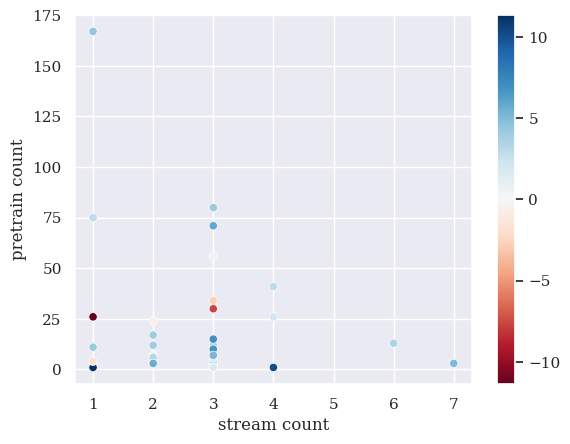

,user,verb,avg_stream_loss,avg_stream_HAG,stream_count,pretrain_count
0,29,92,0.145289,1.524513,6,2550
1,29,67,6.852999,-2.932821,1,471
2,29,49,4.103062,-1.345001,3,727
3,27,55,6.019060,2.018561,2,27
4,27,92,1.171114,0.566360,3,2550
5,27,9,6.254491,-4.833254,3,285
6,27,49,4.923357,-2.826011,2,727
7,108,112,5.283678,-1.260750,2,227
8,108,28,4.462001,0.290732,3,69
9,108,92,0.708659,1.592090,1,2550


[Text(0.5, 0, 'stream count'), Text(0, 0.5, 'pretrain count')]

(-124.4, 3074.4)

(0.7, 7.3)

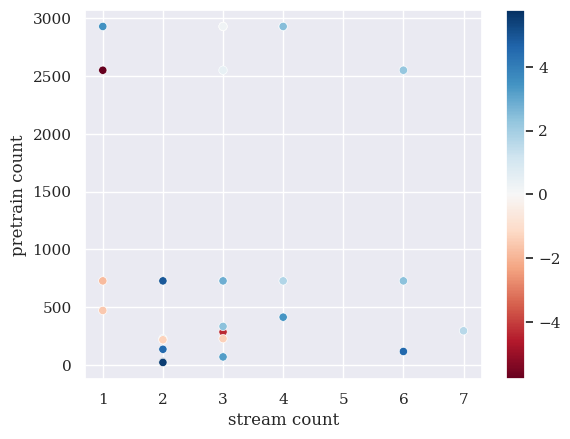

,user,noun,avg_stream_loss,avg_stream_HAG,stream_count,pretrain_count
0,29,472,4.403258,-0.151346,2,32
1,29,313,9.663698,-3.561742,3,193
2,29,462,5.903196,-1.523567,1,67
3,29,256,4.955281,-0.333435,3,38
4,29,403,7.958602,-0.973771,1,3
5,27,294,5.573947,3.925332,2,21
6,27,278,8.325662,-3.107319,3,23
7,27,452,4.830675,-1.807546,3,129
8,27,161,5.464867,-0.101628,2,68
9,108,158,5.861853,-1.411398,2,95


[Text(0.5, 0, 'stream count'), Text(0, 0.5, 'pretrain count')]

(-31.4, 703.4)

(0.55, 10.45)

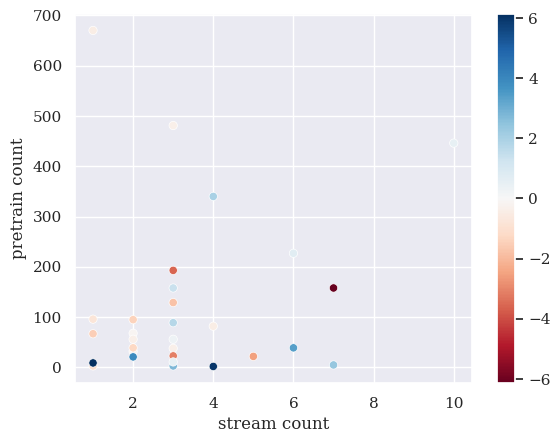

In [17]:
# For colorbar next to scatter, SEE: https://stackoverflow.com/questions/62884183/trying-to-add-a-colorbar-to-a-seaborn-scatterplot
import datetime

# Apply the default theme
# sns.set(font_scale=1.1)
sns.set_context("paper")
sns.set_theme(rc={
    'font.family':'DeJavu Serif',
    'font.serif': 'Times New Roman',
    'font.size':30,
})



title = "INSTANCE_COUNT"
parent_dirname = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S') + "_" + title
parent_dirpath = os.path.join(main_outdir, parent_dirname)


# Read csv
metric_to_plot = "avg_stream_HAG"
cmap = 'RdBu'#"viridis"
action_modes = ['action','verb','noun']
for action_mode in action_modes:
    csv_path =os.path.join(parent_outputdir, dump_filename_fmt.format(action_mode))
    df = pd.read_csv(csv_path)
    df

    # Get CORRELATIOn
#     corr = scipy.stats.pearsonr(df.iter_delta, df.forg,)
#     print(fr"$\rho = {round(corr[0],2)}$")
#     print(fr"$\text{{avg. RF}} = {round(df.forg.mean(),2)} \pm {round(df.forg.sem(),2)}$")
    
    # PLOTS

    ax = sns.scatterplot(
        data=df,
        x="stream_count", y="pretrain_count",  hue=metric_to_plot, #col="user",
        palette=sns.color_palette(cmap, as_cmap=True)
    )
    
    # Make colorbar for on side
    
#     norm = plt.Normalize(df[metric_to_plot].min(), df[metric_to_plot].max()) # Standard normalize

    max_abs = max(abs(df[metric_to_plot].min()),abs(df[metric_to_plot].max()))
    norm = plt.Normalize(-max_abs, max_abs) # Put 0 in the middle
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    # Remove the legend and add a colorbar
    ax.get_legend().remove()
    ax.figure.colorbar(sm)
    
    ax.set(xlabel='stream count', ylabel=f"pretrain count")
    plt.ylim(None, None)
    plt.xlim(None, None)
    
    
#     filename = plot_config['ylabel'].replace(' ','') + '.pdf'
#     filepath = os.path.join(parent_dirpath,filename)
#     os.makedirs(parent_dirpath, exist_ok=True)
#     ax.savefig(filepath)
    
    plt.show()
    plt.close('all')
